In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Dividing dataset into numeric and class dataset**

In [6]:
num_cols= ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
class_cols= ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

<AxesSubplot:>

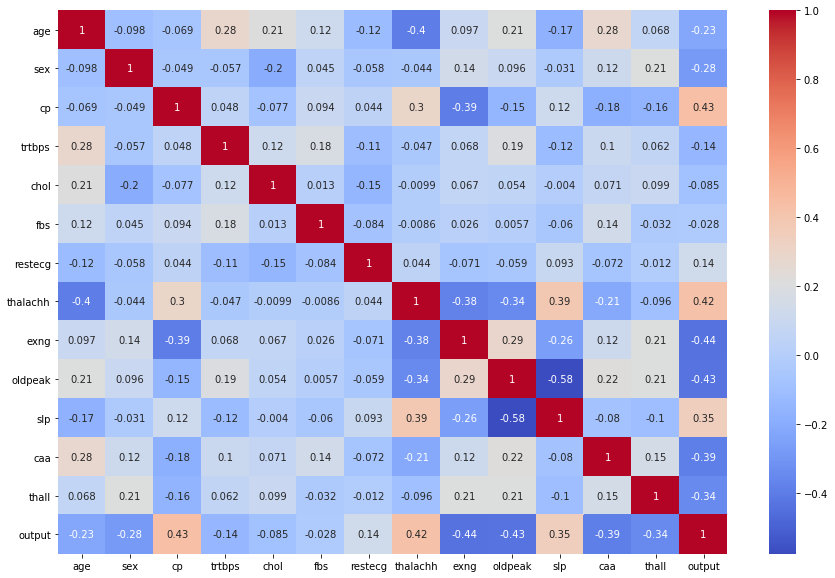

In [7]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot= True, cmap= 'coolwarm')

**Checking the Distribution of Data**

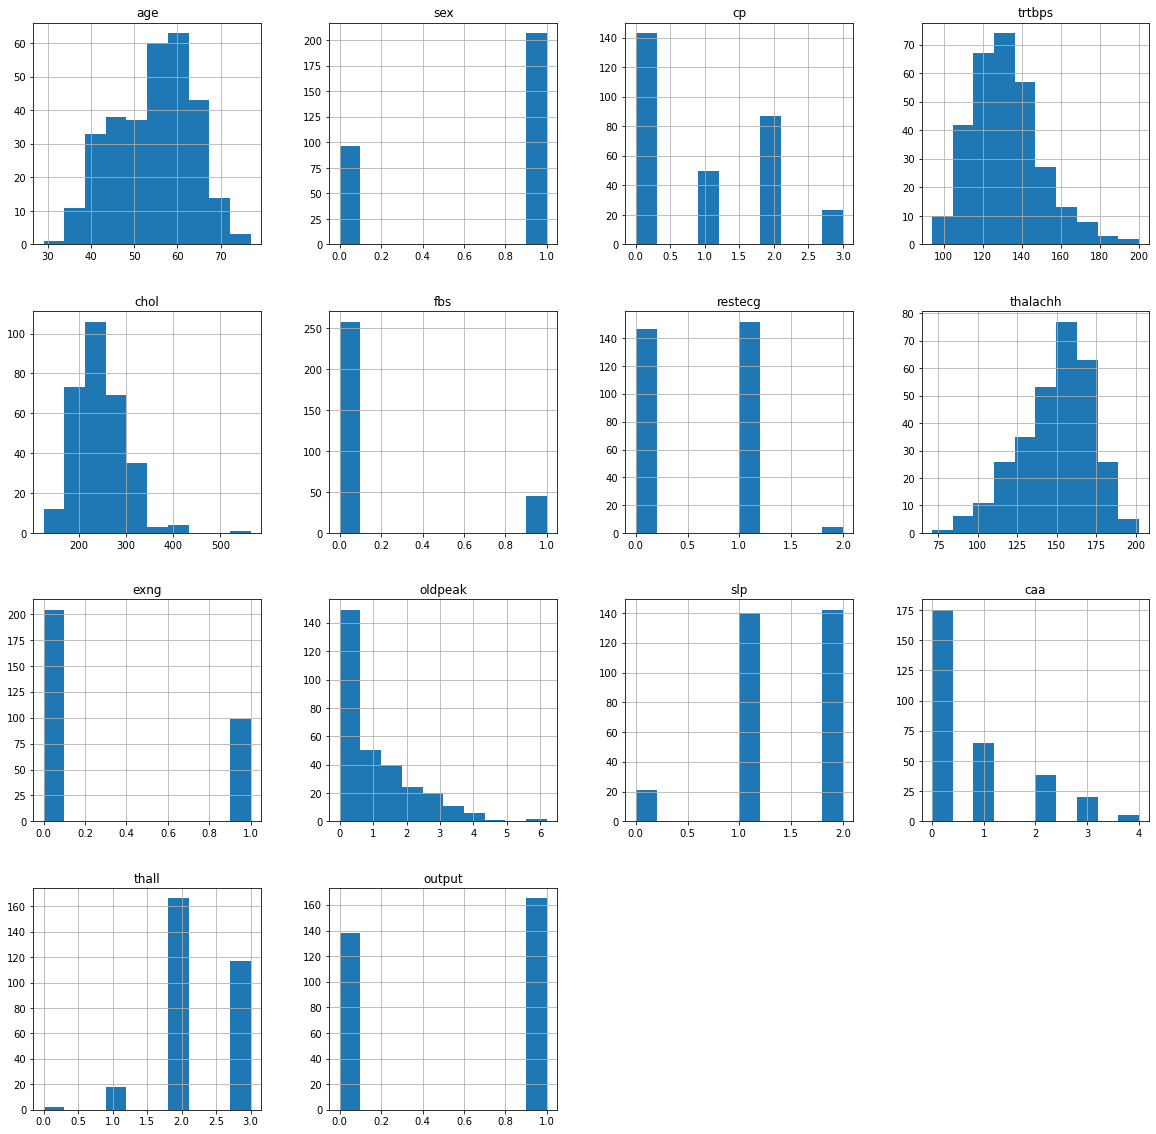

In [8]:
df.hist(figsize=(20,20))
plt.show()

# Creating BoxPlot to check outliers in highly co-related data

Text(0.5, 1.0, 'Slope vs Output')

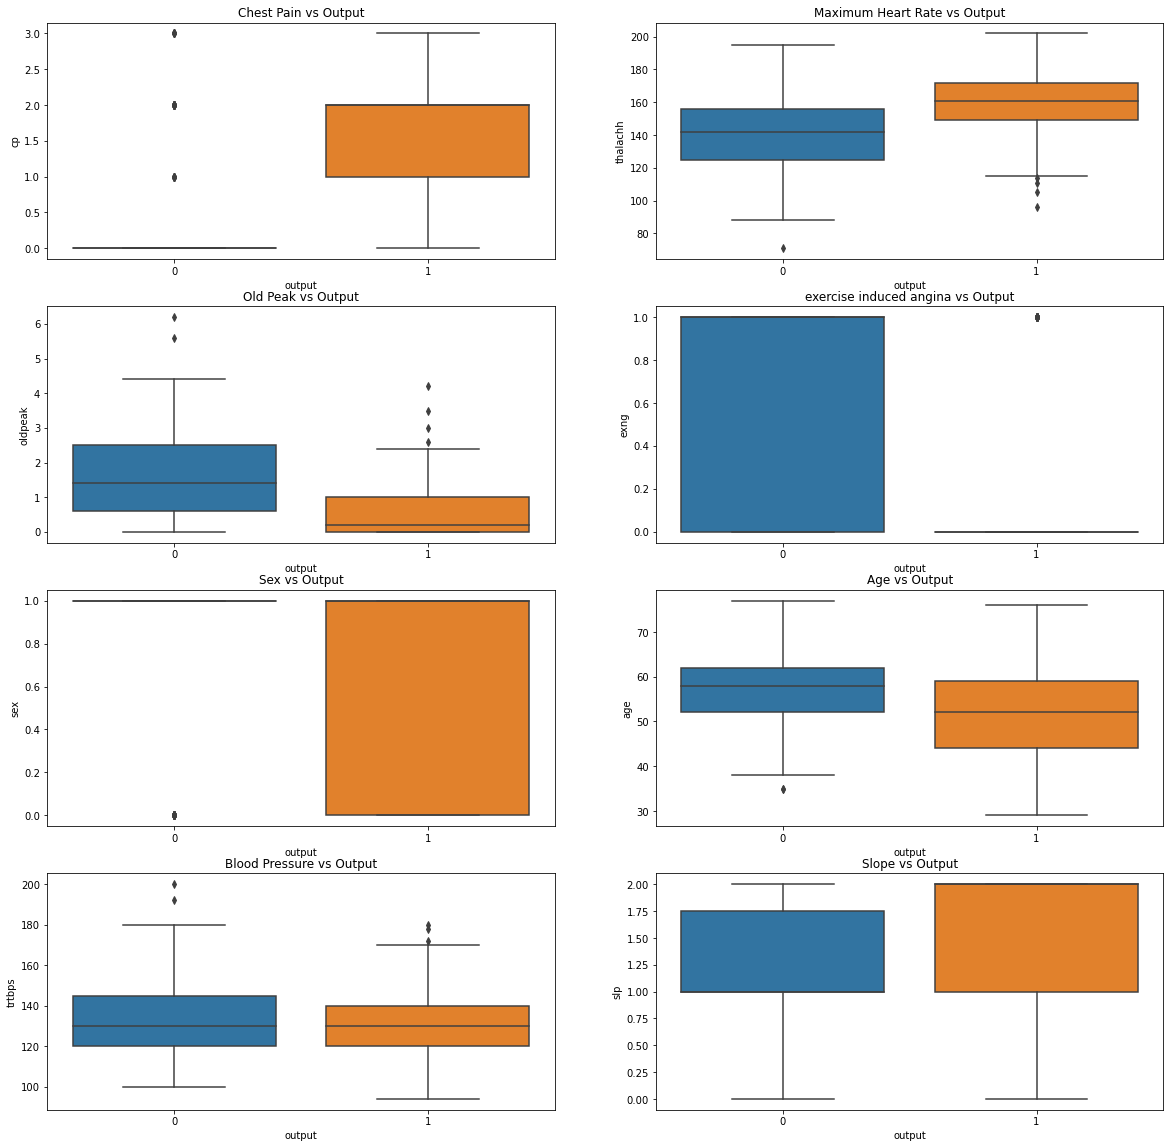

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.boxplot(x= df['output'], y=df['cp'] )
plt.title('Chest Pain vs Output')

plt.subplot(4,2,2)
sns.boxplot(x= df['output'], y= df['thalachh'])
plt.title('Maximum Heart Rate vs Output')

plt.subplot(4,2,3)
sns.boxplot(x= df['output'], y= df['oldpeak'])
plt.title('Old Peak vs Output')

plt.subplot(4,2,4)
sns.boxplot(x= df['output'], y= df['exng'])
plt.title('exercise induced angina vs Output')

plt.subplot(4,2,5)
sns.boxplot(x= df['output'], y= df['sex'])
plt.title('Sex vs Output')

plt.subplot(4,2,6)
sns.boxplot(x= df['output'], y= df['age'])
plt.title('Age vs Output')

plt.subplot(4,2,7)
sns.boxplot(x= df['output'], y= df['trtbps'])
plt.title('Blood Pressure vs Output')

plt.subplot(4,2,8)
sns.boxplot(x= df['output'], y= df['slp'])
plt.title('Slope vs Output')



* Heart Attack is highly positively co-related to Chest Pain(cp)
* Heart Attack is positively co-related to Maximum Heart Rate achieved(thalachh)
* Heart Attack is negatively co-related to OldPeak and EXNG
* People between Age 50-70 more prone to heart attack
* People with chest pain type 0 have highest risk of heart attack
* People with cholestrol level 200-300 have very high risk
* People with max heart rate 150-175 have high risk
* People with thaal rate 2 and 3 have high risk

# Creating Models

In [10]:
X= df.drop('output', axis=1)
y= df['output']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, random_state= 100)

ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [13]:
key= ['LogisticRegression', 'DecisionTreeRegressor', 'DecisionTreeClassifier',  'RandomForestClassifier', 'KNeighborsClassifier', ]

value= [LogisticRegression(), DecisionTreeRegressor() , DecisionTreeClassifier() ,  RandomForestClassifier() ,  KNeighborsClassifier() ]
models= dict(zip(key, value))

In [14]:
models

{'LogisticRegression': LogisticRegression(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier()}

In [15]:
scores= []
for keys, value in models.items():
    score= -1*cross_val_score(value, X, y,  cv=5, scoring= 'neg_mean_absolute_error' )
    scores.append(score)
    print(value, score.mean())
    

LogisticRegression() 0.17508196721311475
DecisionTreeRegressor() 0.3101092896174863
DecisionTreeClassifier() 0.23459016393442625
RandomForestClassifier() 0.19814207650273225
KNeighborsClassifier() 0.3561202185792349


In [16]:
accuracy_scores= []
for key, value in models.items():
    value.fit(X_train, y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key, accuracy)

LogisticRegression 0.819672131147541
DecisionTreeRegressor 0.7540983606557377
DecisionTreeClassifier 0.7377049180327869
RandomForestClassifier 0.8524590163934426
KNeighborsClassifier 0.8524590163934426


 **Logistic Regression and RandomForest Classifier are the best models to predict **

In [17]:
lr= LogisticRegression()

lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

[[21  7]
 [ 4 29]]


In [18]:
rfc= RandomForestClassifier(random_state= 50)
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61

[[21  7]
 [ 1 32]]


**IT IS CLEAR THAT RANDOMFORESTCLASSIFIER IS BEST MODEL FOR THIS PROBLEM**

# Now we do some Hyperparameter Tuning

In [19]:
params= {'max_depth':np.arange(2,10,1),
        'n_estimators': [10,100,200],
        'max_features':[10,100,500],
        }

grid= GridSearchCV(rfc, param_grid= params, cv= 5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [10, 100, 500],
                         'n_estimators': [10, 100, 200]})

In [20]:
grid.best_params_

{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}

In [21]:
grid.best_estimator_.fit(X_train, y_train)
y_predcv= grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_predcv))
print(confusion_matrix(y_test, y_predcv))


              precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61

[[21  7]
 [ 1 32]]


# Hence, we get an accuracy of 87% on test set with RandomForestClassifier